In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import umap
# import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['font.sans-serif'] = 'Arial'
global_xtick_size = {'xsmall': 5,'small': 6, 'medium': 7, 'large': 8}
X_LABEL_SIZE = 8
X_TICK_SIZE = 7

In [2]:
COLOR = {
    'general':'#8E9BAE',
    'general_deep':'#5B7493',
    'gray': '#BAC2CD',
}
METHOD_COLOR = {
    'RNAFM': '#E5CCC2',
    'SpliceBERT': '#4A475C',
    'RNAMSM': '#5B7493',
    'RNAErnie': '#E7ADAC',
    'SpTransformer': '#566878',
    'SpTransformer_short': '#768898',
    'SpliceAI': '#5E5D65',
    'SpliceAI_short': '#7E7D85',
    'DNABERT': '#F8BB86',
    'DNABERT2': '#D3CCE3',
    'RNABERT': '#013E41',
    'DeepM6A':'#E5CCC2',
    'DeepM6ASeq':'#E5CCC2',
    'bCNNMethylpred':'#E5A0A0',
    'NucleotideTransformer': '#60827A',
    'NucleotideTransformer_short': '#A7C9AB',
}
# METHOD_COLOR = {
#     'RNAFM': '#6E4740',
#     'SpliceBERT': '#4A475C',
#     'RNAMSM': '#E7ADAC',
#     'RNAErnie': '#5E5D65',
#     'SpTransformer': '#5B7493',
#     'SpTransformer_short': '#7B94B3',
#     'SpliceAI': '#E5CCC2',
#     'SpliceAI_short': '#A5ACA2',
#     'DNABERT': '#F8BB86',
#     'DNABERT2': '#D3CCE3',
#     'RNABERT': '#013E41',
#     'DeepM6A':'#E5CCC2',
#     'DeepM6ASeq':'#E5CCC2'
# }

## nRC task

In [4]:
def draw_epoch_performance(data:pd.DataFrame, column='f1s',skip_method=['nRC', 'RNACon']):
    methods = data['Method'].unique()
    for method in methods:
        if method in skip_method:
            continue
        method_data = data[data['Method'] == method]
        color = METHOD_COLOR[method] if method in METHOD_COLOR else COLOR['general']
        plt.plot(method_data['Epoch'], 
                 method_data[column], 
                 linewidth=1,
                 label=method,
                 color=color,alpha=0.8)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.ylim(0,1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    

In [5]:
def load_nRC_data(file_list,param_list,column='f1s'):
    assert len(file_list) == len(param_list)
    data = []
    for i in range(len(file_list)):
        df = pd.read_csv(file_list[i])
        df['param'] = param_list[i]
        data.append(df)
    # for each method, use the parameter with the best performance
    data = pd.concat(data)
    data = data.reset_index(drop=True)
    result = []
    param_dict = {}
    for method in data['Method'].unique():
        method_data = data[data['Method'] == method]
        if isinstance(column, list) and (len(column) > 1):
            best_param = method_data.loc[method_data[column].mean(axis=1).idxmax()]['param']
        else:
            best_param = method_data.loc[method_data[column].idxmax()]['param']
        result.append(method_data[method_data['param'] == best_param])
        param_dict[method] = best_param
    result = pd.concat(result)
    return result, param_dict


{'RNAFM': 'nRC_1_4', 'RNAMSM': 'nRC_1_4', 'RNAErnie': 'nRC_1_4', 'RNABERT': 'nRC_1_4', 'DNABERT': 'nRC_1_4', 'SpliceBERT': 'nRC_1_4', 'DNABERT2': 'nRC_1_4', 'NucleotideTransformer': 'nRC_1_5', 'ncRDense': 'nRC_1_4', 'nRC': 'nRC_1_4', 'RNACon': 'nRC_1_4'}


meta NOT subset; don't know how to subset; dropped


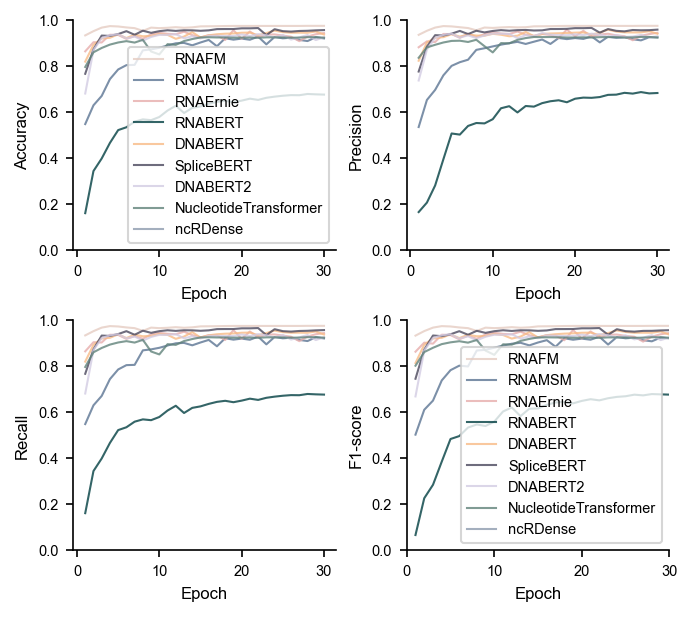

In [6]:
def draw_nRC_supp(data):

    fig = plt.figure(figsize=(4.5, 4), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=2, ncols=2)

    #
    ax1 = fig.add_subplot(gs1[0, 0])
    draw_epoch_performance(data, column='accuracy')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('Accuracy', size=X_LABEL_SIZE)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)

    plt.legend(prop={'size': X_TICK_SIZE},
               loc='lower right')

    #
    ax2 = fig.add_subplot(gs1[0, 1])
    draw_epoch_performance(data, column='precision')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('Precision', size=X_LABEL_SIZE)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)

    #
    ax3 = fig.add_subplot(gs1[1, 0])
    draw_epoch_performance(data, column='recall')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('Recall', size=X_LABEL_SIZE)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)

    #
    ax4 = fig.add_subplot(gs1[1, 1])
    draw_epoch_performance(data, column='f1s')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('F1-score', size=X_LABEL_SIZE)
    plt.xlim(-1,29)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)

    plt.legend(prop={'size': X_TICK_SIZE},
               loc='lower right')
    


file_list = ['tables/nRC_1_4_collected_data.csv','tables/nRC_1_5_collected_data.csv']
lr_list = ['nRC_1_4','nRC_1_5']
data,param_dict = load_nRC_data(file_list,lr_list)
print(param_dict)
draw_nRC_supp(data)
plt.savefig('figures/nRCcls_performance_sup.png', dpi=300)
plt.savefig('figures/nRCcls_performance_sup.pdf', dpi=300)

In [98]:
def draw_performance_bar(data:pd.DataFrame, column='f1s'):
    color_list = [COLOR['general'] if method not in['DeepM6A','nRC','RNACon','Optimus','ncRDense','ResNet'] else '#808080' for method in data.index]
    plt.barh(data.index, data[column],height=0.65,color=color_list)
    # display the value on the bar
    
    for i, v in enumerate(data[column]):
        plt.text(v - 0.02, i, '{:.4f}'.format(v), color='white',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

  Method  Epoch     f1s  precision  recall  accuracy     mcc       Time  \
0  RNAFM      0  0.9321     0.9355  0.9331    0.9331  0.9278  185.2310s   
1  RNAFM      1  0.9518     0.9531  0.9515    0.9515  0.9476  181.6791s   
2  RNAFM      2  0.9669     0.9671  0.9669    0.9669  0.9642  181.3293s   
3  RNAFM      3  0.9734     0.9736  0.9735    0.9735  0.9713  181.8669s   
4  RNAFM      4  0.9719     0.9722  0.9719    0.9719  0.9696  181.2916s   

     param  
0  nRC_1_4  
1  nRC_1_4  
2  nRC_1_4  
3  nRC_1_4  
4  nRC_1_4  


meta NOT subset; don't know how to subset; dropped


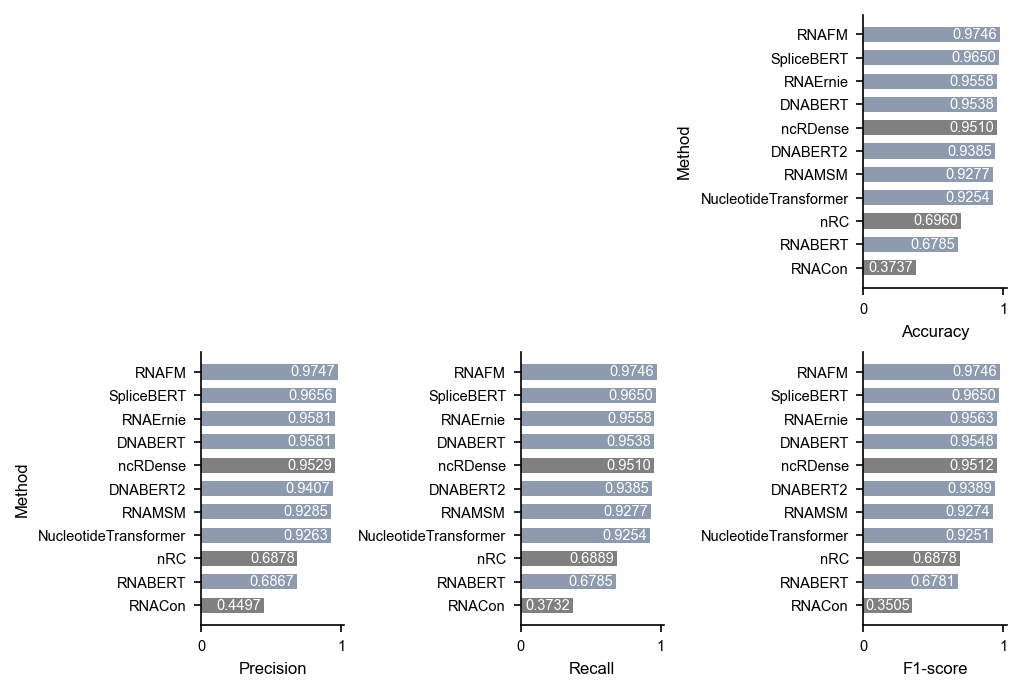

In [61]:
def draw_nRC(data):
    print(data.head())

    performance = []
    methods = data['Method'].unique()
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['f1s'].idxmax()]
        performance.append(best_epoch)
    performance = pd.DataFrame(performance)
    performance.set_index('Method', inplace=True)
    performance.sort_values('f1s', ascending=True, inplace=True)

    # Plot the data

    fig = plt.figure(figsize=(6.7, 4.5), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=2, ncols=6)
    ax1 = fig.add_subplot(gs1[0, 4:6])
    draw_performance_bar(performance, column='accuracy')
    plt.xlabel('Accuracy', size=X_LABEL_SIZE)
    plt.ylabel('Method', size=X_LABEL_SIZE)

    ax2 = fig.add_subplot(gs1[1, 0:2])
    
    draw_performance_bar(performance, column='precision')
    plt.xlabel('Precision', size=X_LABEL_SIZE)
    plt.ylabel('Method', size=X_LABEL_SIZE)


    ax3 = fig.add_subplot(gs1[1, 2:4])
    draw_performance_bar(performance, column='recall')
    plt.xlabel('Recall', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    ax4 = fig.add_subplot(gs1[1, 4:])
    draw_performance_bar(performance, column='f1s')
    plt.xlabel('F1-score', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)
    
    return
data,param_dict = load_nRC_data(file_list,lr_list)
draw_nRC(data)
plt.savefig('figures/nRCcls_performance.png', dpi=150)
plt.savefig('figures/nRCcls_performance.pdf', dpi=150)

meta NOT subset; don't know how to subset; dropped


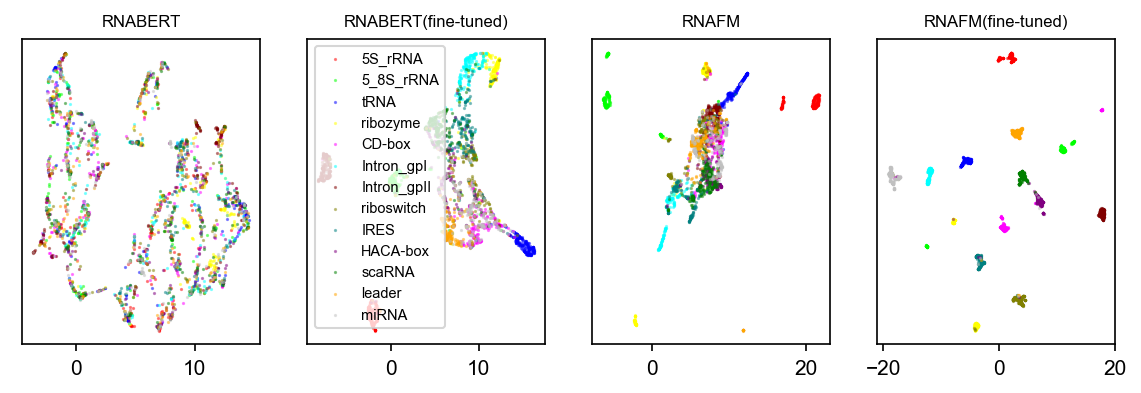

In [62]:
def draw_umap(pred,label):
    UMAP_COLORS = ['#FF0000','#00FF00','#0000FF','#FFFF00','#FF00FF','#00FFFF','#800000','#808000','#008080','#800080','#008000','#FFA500','#C0C0C0']
    nRC_labels = {
        0: "5S_rRNA",
        1: "5_8S_rRNA",
        2: "tRNA",
        3: "ribozyme",
        4: "CD-box",
        5: "Intron_gpI",
        6: "Intron_gpII",
        7: "riboswitch",
        8: "IRES",
        9: "HACA-box",
        10: "scaRNA",
        11: "leader",
        12: "miRNA"
    }
    pred = np.load(pred)
    label = np.load(label)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(pred)
    # 根据标签绘制不同颜色的点
    for y in range(13):  # 从0到12共13个类别
        indices = (y == label)
        plt.scatter(embedding[indices, 0], embedding[indices, 1], 
                    label=f"{nRC_labels[y]}",
                    s=0.3,
                    alpha=0.5,
                    facecolors=UMAP_COLORS[y], 
                    edgecolors=None
                    # c=UMAP_COLORS[y]
                    )
    plt.yticks([])

# 创建图表
plt.figure(figsize=(9.4, 2.7),dpi=150)

plt.subplot(1, 4, 1)
pred = 'tables/nRC/RNABERT/epoch_0_emb_pred.npy'
label = 'tables/nRC/RNABERT/epoch_0_emb_labels.npy'
draw_umap(pred,label)
plt.title('RNABERT',fontsize=X_LABEL_SIZE)

plt.subplot(1, 4, 2)
pred = 'tables/nRC/RNABERT/epoch_29_emb_pred.npy'
label = 'tables/nRC/RNABERT/epoch_29_emb_labels.npy'
draw_umap(pred,label)
plt.title('RNABERT(fine-tuned)',fontsize=X_LABEL_SIZE)
plt.legend(loc='upper left',fontsize=X_TICK_SIZE)


plt.subplot(1, 4, 3)
pred = 'tables/nRC/RNAFM/epoch_0_emb_pred.npy'
label = 'tables/nRC/RNAFM/epoch_0_emb_labels.npy'
draw_umap(pred,label)
plt.title('RNAFM',fontsize=X_LABEL_SIZE)

plt.subplot(1, 4, 4)
pred = 'tables/nRC/RNAFM/epoch_29_emb_pred.npy'
label = 'tables/nRC/RNAFM/epoch_29_emb_labels.npy'
draw_umap(pred,label)
plt.title('RNAFM(fine-tuned)',fontsize=X_LABEL_SIZE)

plt.savefig('figures/nRCcls_umap.png', dpi=300)
plt.savefig('figures/nRCcls_umap.pdf',dpi=300)

meta NOT subset; don't know how to subset; dropped


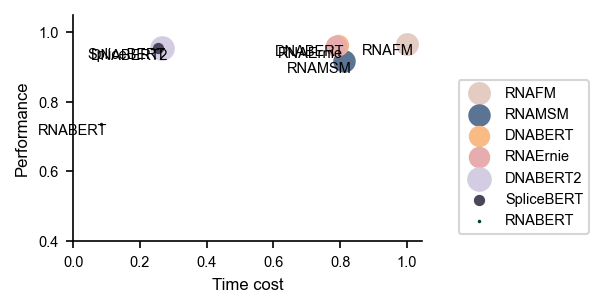

In [63]:
def draw_parameter_performance():
    # manually collected from above
    trainable_parameters = {
        'RNAFM': 99529879,
        'SpliceBERT': 19452941,
        'RNAMSM': 95921177,
        'RNAErnie': 87239437,
        'DNABERT': 86104333,
        'DNABERT2': 117078541,
        'RNABERT': 480013,
    }
    performance = {
        'RNAFM': 0.9660,
        'DNABERT': 0.9639,
        'RNAErnie': 0.9587,
        'SpliceBERT': 0.9554,
        'DNABERT2': 0.9534,
        'RNAMSM': 0.9164,
        'RNABERT': 0.7358,
    }
    time_cost = {
        'RNAFM': 1,
        'RNAMSM': 0.8132,
        'DNABERT': 0.7937,
        'RNAErnie': 0.7890,
        'DNABERT2': 0.2656,
        'SpliceBERT': 0.2555,
        'RNABERT': 0.0833,
    }
    plt.figure(figsize=(3,2),dpi=150)
    methods = time_cost.keys()
    for method in methods:
        # relative_param = trainable_parameters[method] / trainable_parameters['RNABERT']
        relative_param = trainable_parameters[method] / 1e6
        plt.scatter(time_cost[method],performance[method],s=relative_param,c=METHOD_COLOR[method],label=method)
        plt.xticks(np.arange(0,1.01,0.2),size=X_TICK_SIZE)
        plt.yticks(size=X_TICK_SIZE)
        plt.ylim(0.4,1.05)

        plt.text(time_cost[method] + 0.02, performance[method] - 0.02, method, color='black',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
        # plt.yticks
    plt.legend(prop={'size': X_TICK_SIZE},
        loc='lower right', ncol=1,bbox_to_anchor=(1.5,0,0,0))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Time cost',size=X_LABEL_SIZE)
    plt.ylabel('Performance',size=X_LABEL_SIZE)
    
draw_parameter_performance()

plt.savefig('figures/time_cost.png', dpi=150)
plt.savefig('figures/time_cost.pdf', dpi=150)


## m6A task

{'RNAFM': '1e-5', 'RNAMSM': '1e-5', 'RNAErnie': '1e-5', 'RNABERT': '1e-5', 'DNABERT': '1e-5', 'DNABERT2': '1e-5', 'SpliceBERT': '1e-5', 'DeepM6A': '1e-4', 'bCNNMethylpred': '1e-5', 'NucleotideTransformer': '1e-4'}
{'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'RNABERT': '1e-4', 'DNABERT': '1e-4', 'DNABERT2': '1e-5', 'SpliceBERT': '1e-4', 'DeepM6A': '1e-4', 'bCNNMethylpred': '1e-5', 'NucleotideTransformer': '1e-4'}
{'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-4', 'RNABERT': '1e-4', 'DNABERT': '1e-4', 'DNABERT2': '1e-4', 'SpliceBERT': '1e-4', 'DeepM6A': '1e-4', 'bCNNMethylpred': '1e-5', 'NucleotideTransformer': '1e-4'}


meta NOT subset; don't know how to subset; dropped


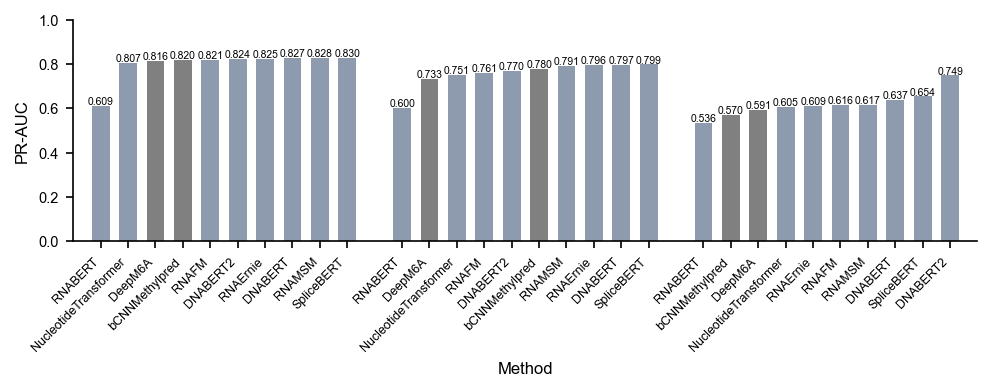

In [65]:
tick_list=[]
label_list=[]
def draw_performance_compare(data,column='pr_auc',offset=0):
    methods = data['Method'].unique()
    select = []
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['pr_auc'].idxmax()]['Epoch']
        best_perf = method_data.loc[method_data['pr_auc'].idxmax()]
        select.append(best_perf)
    select = pd.DataFrame(select)
    select.sort_values(column, ascending=True, inplace=True)
    # plt.bar(select['Method'], select[column],
    #          width=0.65, color=COLOR['general'])
    color_list = [COLOR['general'] if method not in['DeepM6A','bCNNMethylpred'] else '#808080' for method in select['Method']]
    plt.bar(np.arange(len(select))+offset, select[column],
             width=0.65, color=color_list)
    tick_list.extend(np.arange(len(select))+offset)
    label_list.extend(select['Method'])
    # display the value on the bar
    for i, v in enumerate(select[column]):
        plt.text(i+offset,v + 0.02, '{:.3f}'.format(v), color='black',
                 va='center', ha='center', fontsize=global_xtick_size['xsmall'])
    plt.xlabel('Method', size=X_LABEL_SIZE)
    plt.ylabel(column, size=X_LABEL_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.ylim(0,1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.figure(figsize=(6.5, 2.5), dpi=150, constrained_layout=True)

### 1.0 training data
file_list = ['./tables/m6a101_4_collected_data.csv',
             './tables/m6a101_5_collected_data.csv']
param_list = ['1e-4','1e-5']
data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
print(param_dict)
draw_performance_compare(data)

### 0.1 training data
file_list = ['./tables/m6a101_4_0.1_collected_data.csv',
             './tables/m6a101_5_0.1_collected_data.csv']
param_list = ['1e-4','1e-5']
data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
print(param_dict)
draw_performance_compare(data,offset=11)

### 0.01 training data
file_list = ['./tables/m6a101_4_0.01_collected_data.csv',
             './tables/m6a101_5_0.01_collected_data.csv']
param_list = ['1e-4','1e-5']
data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
print(param_dict)
draw_performance_compare(data,offset=22)


plt.xticks(tick_list,label_list,rotation=45,ha='right',fontsize=global_xtick_size['small'])
plt.xlim(-1,32)
plt.ylabel('PR-AUC',size=X_LABEL_SIZE)

plt.savefig('figures/m6a101_pr_auc.png', dpi=300)
plt.savefig('figures/m6a101_pr_auc.pdf', dpi=300)

{'RNAFM': '1e-5', 'RNAMSM': '1e-5', 'RNAErnie': '1e-5', 'RNABERT': '1e-5', 'DNABERT': '1e-5', 'DNABERT2': '1e-5', 'SpliceBERT': '1e-5', 'DeepM6A': '1e-4', 'bCNNMethylpred': '1e-5', 'NucleotideTransformer': '1e-4'}


meta NOT subset; don't know how to subset; dropped


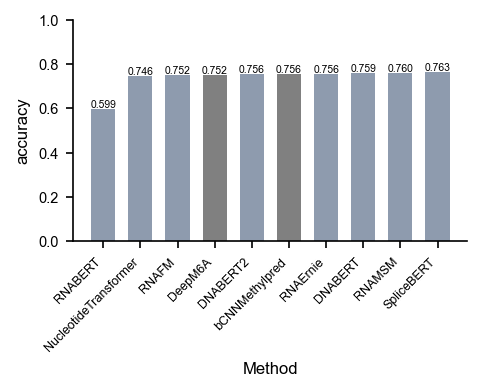

In [66]:
plt.figure(figsize=(3.1, 2.5), dpi=150, constrained_layout=True)
### 1.0 training data
file_list = ['./tables/m6a101_4_collected_data.csv',
             './tables/m6a101_5_collected_data.csv']
param_list = ['1e-4','1e-5']
data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
print(param_dict)
tick_list=[]
label_list=[]
draw_performance_compare(data,offset=0,column='accuracy')
plt.xticks(tick_list,label_list,rotation=45,ha='right',fontsize=global_xtick_size['small'])
# 

plt.savefig('figures/m6a101_accuracy.png', dpi=300)
plt.savefig('figures/m6a101_accuracy.pdf', dpi=300)

In [67]:
def draw_epoch_performance_m6A(data,column='f1s',legend=False):
    methods = data['Method'].unique()
    for method in methods:
        if method in ['nRC', 'RNACon']:
            continue
        method_data = data[data['Method'] == method]
        # line_style = '-' if '(Long)' in method else '--'
        line_style = '-' if '(Long)' in method else '-'
        method_name = method.strip('(Long)')
        color = METHOD_COLOR[method_name] if method_name in METHOD_COLOR else METHOD_COLOR['']
        plt.plot(method_data['Epoch']+1,
                 method_data[column],
                 line_style,
                 linewidth=1,
                 color=color,
                 label=method_name,
                 alpha=0.8)

    plt.xticks(np.arange(1, 11, 1), fontsize=X_TICK_SIZE)
    plt.yticks(np.arange(0,1.1,0.1),fontsize=X_TICK_SIZE)
    plt.xlim(0, 10)
    plt.ylim(0,1)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)

    if legend:
        plt.legend(prop={'size': X_TICK_SIZE},
                loc='lower right', ncol=1)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

In [68]:
file_list = ['./tables/m6a101_4_collected_data.csv',
             './tables/m6a101_5_collected_data.csv']
param_list = ['1e-4','1e-5']
data_short,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')

file_list = ['./tables/m6a509_4_collected_data.csv',
             './tables/m6a509_5_collected_data.csv']
param_list = ['1e-4','1e-5']
data_long,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')

data_short['Method'] = data_short['Method'].astype(str)
data_long['Method'] = data_long['Method'].astype(str)

data_long['Method'] = data_long['Method'] + '(Long)'

data_m6a = pd.concat([data_short, data_long])
data_m6a['Time'] = data_m6a['Time'].apply(lambda x: float(str(x).split('s')[0]))

data_m6a['Method'] = data_m6a['Method'].str.replace('DeepM6A','DeepM6ASeq')
data_m6a.head()

,Method,Epoch,f1s,precision,recall,accuracy,mcc,pr_auc,auc,Time,param
200,RNAFM,0,0.7538,0.7551,0.7540,0.7540,0.5091,0.8165,0.8302,274.3671,1e-5
201,RNAFM,1,0.7512,0.7551,0.7520,0.7520,0.5070,0.8210,0.8345,275.5494,1e-5
202,RNAFM,2,0.7489,0.7537,0.7498,0.7498,0.5035,0.8130,0.8270,275.7099,1e-5
203,RNAFM,3,0.7402,0.7403,0.7402,0.7402,0.4805,0.7902,0.8128,275.5427,1e-5
204,RNAFM,4,0.7291,0.7291,0.7291,0.7291,0.4583,0.7711,0.7963,275.4790,1e-5


meta NOT subset; don't know how to subset; dropped


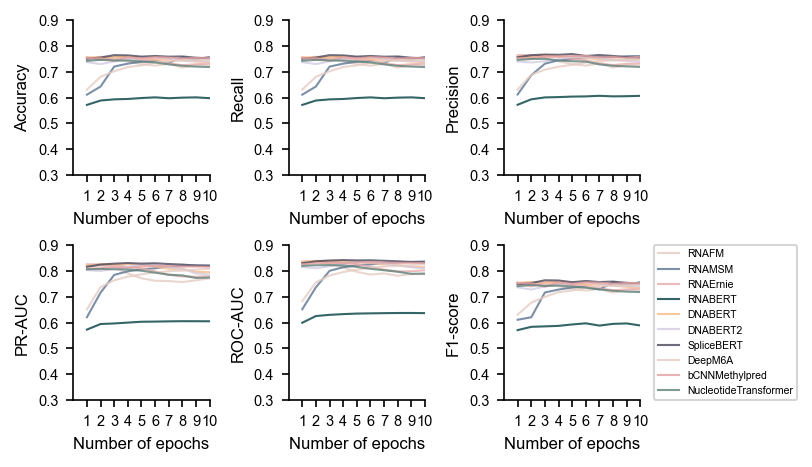

In [69]:
def draw_m6a_supp(data,legend=True):
    gs1 = fig.add_gridspec(nrows=2, ncols=3)
    #
    def template(data,column,label):    
        draw_epoch_performance_m6A(data, column=column)
        plt.ylabel(label, size=X_LABEL_SIZE)
        plt.xlabel('Number of epochs', size=X_LABEL_SIZE)
        plt.ylim(0.3,0.9)

    ax1 = fig.add_subplot(gs1[0, 0])
    template(data,'accuracy','Accuracy')

    ax2 = fig.add_subplot(gs1[0, 1])
    template(data,'recall','Recall')

    ax3 = fig.add_subplot(gs1[0, 2])
    template(data,'precision','Precision')

    ax4 = fig.add_subplot(gs1[1, 0])
    template(data,'pr_auc','PR-AUC')

    ax5 = fig.add_subplot(gs1[1, 1])
    template(data,'auc','ROC-AUC')

    ax6 = fig.add_subplot(gs1[1, 2])
    template(data,'f1s','F1-score')
    
    plt.legend(prop={'size': X_TICK_SIZE-2},
                loc = (1.1,0.0))
    

# Load result
fig = plt.figure(figsize=(5.3, 3.0), dpi=150, constrained_layout=True)
draw_m6a_supp(data_short)
plt.savefig('figures/m6A_miclip_supp1.png')
plt.savefig('figures/m6A_miclip_supp1.pdf')

meta NOT subset; don't know how to subset; dropped


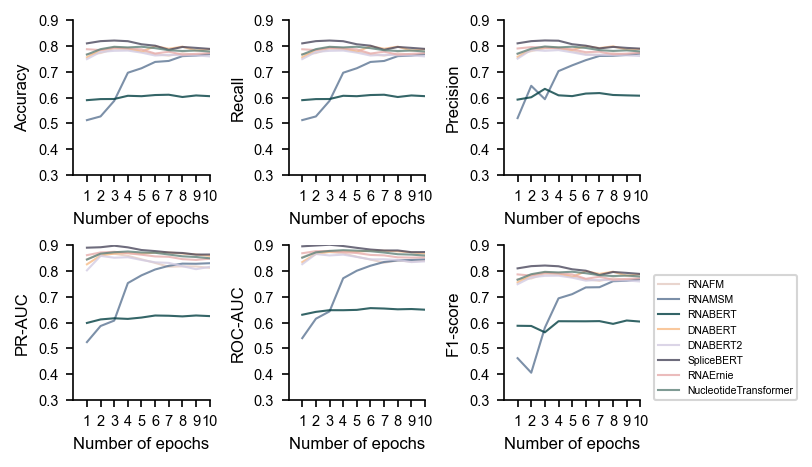

In [70]:
fig = plt.figure(figsize=(5.3, 3.0), dpi=150, constrained_layout=True)
draw_m6a_supp(data_long)
plt.savefig('figures/m6A_miclip_supp2.png')
plt.savefig('figures/m6A_miclip_supp2.pdf')

meta NOT subset; don't know how to subset; dropped


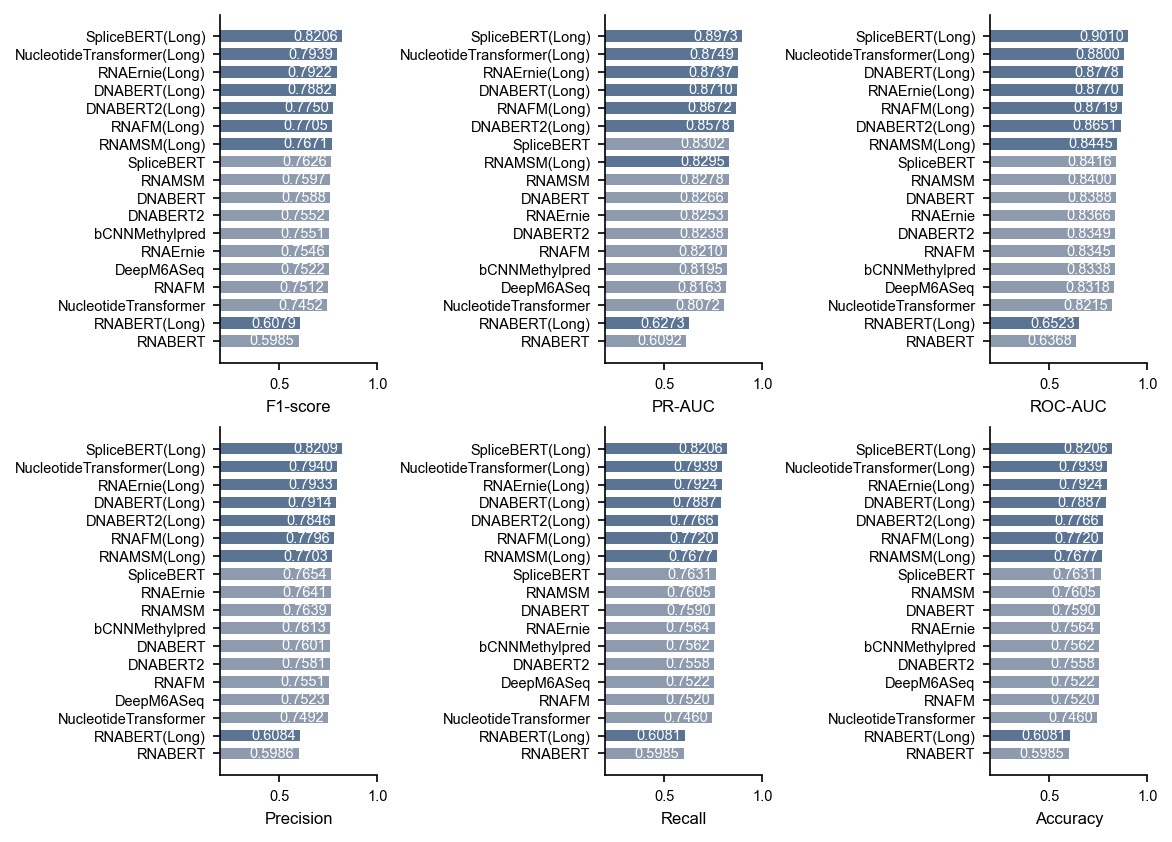

In [71]:
def get_best_epoches(data,column='pr_auc'):
    result = []
    for method in data['Method'].unique():
        method_data = data[data['Method'] == method]
        best_param = method_data.loc[method_data[column].idxmax()]
        result.append(best_param)
    return pd.DataFrame(result)

def draw_barplot(data,show_column,xlabel):
    data = get_best_epoches(data,'pr_auc')
    data.sort_values(show_column,ascending=True,inplace=True)
    colors = [COLOR['general_deep'] if 'Long' in method else COLOR['general'] for method in data['Method']]
    plt.barh(data['Method'], data[show_column],
             height=0.65, color=colors)
    # display the value on the bar
    for i, v in enumerate(data[show_column]):
        plt.text( v - 0.02,i, '{:.4f}'.format(v), color='white',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
    plt.xlabel(xlabel, size=X_LABEL_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xlim(0.2,1.0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

def draw_m6a_performance_barplot(data):
    plt.figure(figsize=(7.7, 5.5), dpi=150, constrained_layout=True)
    plt.subplot(2, 3, 1)
    draw_barplot(data,'f1s','F1-score')
    plt.subplot(2, 3, 2)
    draw_barplot(data,'pr_auc','PR-AUC')
    plt.subplot(2, 3, 3)
    draw_barplot(data,'auc','ROC-AUC')
    plt.subplot(2, 3, 4)
    draw_barplot(data,'precision','Precision')
    plt.subplot(2, 3, 5)
    draw_barplot(data,'recall','Recall')
    plt.subplot(2, 3, 6)
    draw_barplot(data,'accuracy','Accuracy')

draw_m6a_performance_barplot(data_m6a)
plt.savefig('figures/m6A_miclip_all_performance.png')
plt.savefig('figures/m6A_miclip_all_performance.pdf',dpi=300)

clip pr_auc
SpliceBERT 0.8302
RNAMSM 0.8278
DNABERT 0.8266
RNAErnie 0.8253
DNABERT2 0.8238
RNAFM 0.821
bCNNMethylpred 0.8195
DeepM6A 0.8163
NucleotideTransformer 0.8072
RNABERT 0.6092
clip pr_auc
SpliceBERT(Long) 0.8973
NucleotideTransformer(Long) 0.8749
RNAErnie(Long) 0.8737
DNABERT(Long) 0.871
RNAFM(Long) 0.8672
DNABERT2(Long) 0.8578
RNAMSM(Long) 0.8295
RNABERT(Long) 0.6273
clip auc
SpliceBERT 0.8416
RNAMSM 0.84
DNABERT 0.8388
RNAErnie 0.8366
DNABERT2 0.8349
RNAFM 0.8345
bCNNMethylpred 0.8338
DeepM6A 0.8318
NucleotideTransformer 0.8215
RNABERT 0.6368
clip auc
SpliceBERT(Long) 0.901
NucleotideTransformer(Long) 0.88
DNABERT(Long) 0.8778
RNAErnie(Long) 0.877
RNAFM(Long) 0.8719
DNABERT2(Long) 0.8651
RNAMSM(Long) 0.8445
RNABERT(Long) 0.6523


meta NOT subset; don't know how to subset; dropped


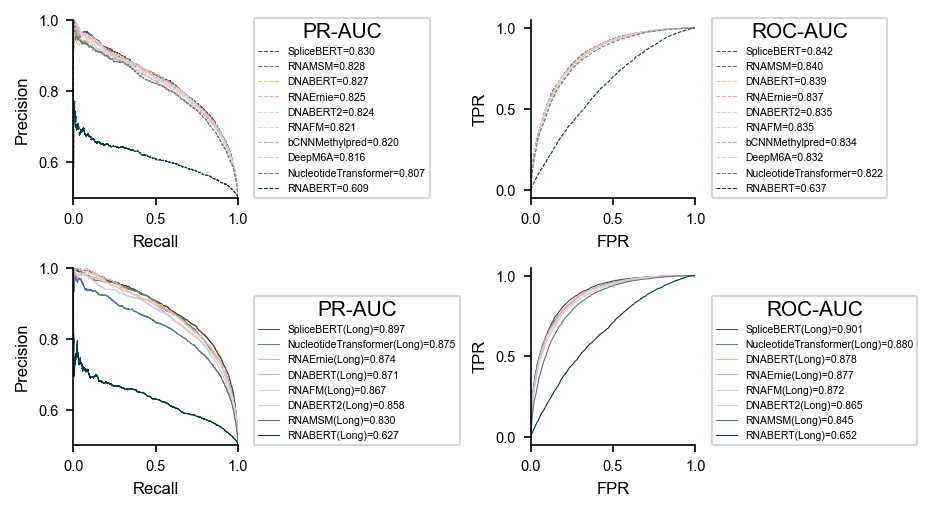

In [72]:
def draw_performance_curve(data:pd.DataFrame,column='pr_auc',group='clip'):
    data = data.sort_values(by=column,ascending=False)
    methods = data['Method'].unique()
    print(group,column)
    for method in methods:
        # if '+' in method:
        #     continue
        # if method not in ['DNABERT2','DNABERT2+']:
        #     continue
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['pr_auc'].idxmax()]['Epoch']
        best_perf = method_data.loc[method_data['pr_auc'].idxmax()][column]
        use_param = method_data.loc[method_data['pr_auc'].idxmax()]['param']

        print(method, best_perf)

        if '(Long)' in method:
            folder = f'm6a_512_{group}_{use_param}'
        else:
            folder = f'm6a_101_{group}_{use_param}'

        method_name = method.strip('(Long)')
        line_style = '-' if '(Long)' in method else '--'
        color = METHOD_COLOR[method_name] if method_name in METHOD_COLOR else METHOD_COLOR['']

        if column == 'pr_auc':
            precision = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_pr_auc_1.npy')
            recall = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_pr_auc_2.npy')
            plt.plot(recall, precision, label=f'{method}={best_perf:.3f}', alpha=1, color=color, linestyle=line_style, linewidth=0.5)
        
        elif column == 'auc':
            fpr = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_auc_1.npy')
            tpr = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_auc_2.npy')
            plt.plot(fpr, tpr, label=f'{method}={best_perf:.3f}', alpha=1, color=color, linestyle=line_style, linewidth=0.5)
        else:
            raise ValueError('Invalid column name')
        plt.xticks(fontsize=X_TICK_SIZE)
        plt.yticks(fontsize=X_TICK_SIZE)
        plt.xlim(0, 1)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)


data_m6a = pd.concat([data_short, data_long])

fig = plt.figure(figsize=(6.1, 3.3), dpi=150, constrained_layout=True)
plt.subplot(2,2,1)
draw_performance_curve(data_short,column='pr_auc',group='clip')
plt.xlabel('Recall', size=X_LABEL_SIZE)
plt.ylabel('Precision', size=X_LABEL_SIZE)
plt.legend(prop={'size': X_TICK_SIZE-2},
            loc = (1.1,0.0),title='PR-AUC')
plt.ylim(0.5,1.0)

plt.subplot(2,2,3)
draw_performance_curve(data_long,column='pr_auc',group='clip')
plt.xlabel('Recall', size=X_LABEL_SIZE)
plt.ylabel('Precision', size=X_LABEL_SIZE)
plt.legend(prop={'size': X_TICK_SIZE-2},
            loc = (1.1,0.0),title='PR-AUC')
plt.ylim(0.5,1.0)

plt.subplot(2,2,2)
draw_performance_curve(data_short,column='auc',group='clip')
plt.legend(prop={'size': X_TICK_SIZE-2},
            loc = (1.1,0.0),title='ROC-AUC')
plt.xlabel('FPR', size=X_LABEL_SIZE)
plt.ylabel('TPR', size=X_LABEL_SIZE)

plt.subplot(2,2,4)
draw_performance_curve(data_long,column='auc',group='clip')
plt.legend(prop={'size': X_TICK_SIZE-2},
            loc = (1.1,0.0),title='ROC-AUC')
plt.xlabel('FPR', size=X_LABEL_SIZE)
plt.ylabel('TPR', size=X_LABEL_SIZE)

plt.savefig('figures/m6A_miclip_curve.png')
plt.savefig('figures/m6A_miclip_curve.pdf',dpi=300)

## Splicing task

In [73]:
tissue_names_53 = ['Subcutaneous - Adipose',
  'Visceral (Omentum) - Adipose',
  'Adrenal Gland',
  'Aorta - Artery',
  'Coronary - Artery',
  'Tibial - Artery',
  'Bladder',
  'Amygdala - Brain',
  'Anterior cingulate cortex (BA24) - Brain',
  'Caudate (basal ganglia) - Brain',
  'Cerebellar Hemisphere - Brain',
  'Cerebellum - Brain',
  'Cortex - Brain',
  'Frontal Cortex (BA9) - Brain',
  'Hippocampus - Brain',
  'Hypothalamus - Brain',
  'Nucleus accumbens (basal ganglia) - Brain',
  'Putamen (basal ganglia) - Brain',
  'Spinal cord (cervical c-1) - Brain',
  'Substantia nigra - Brain',
  'Breast - Mammary Tissue',
  'Cells - EBV-transformed lymphocytes',
  'Cells - Cultured fibroblasts',
  'Cervix - Ectocervix',
  'Cervix - Endocervix',
  'Colon - Sigmoid',
  'Colon - Transverse',
  'Esophagus - Gastroesophageal Junction',
  'Esophagus - Mucosa',
  'Esophagus - Muscularis',
  'Fallopian Tube',
  'Heart - Atrial Appendage',
  'Heart - Left Ventricle',
  'Kidney - Cortex',
  'Liver',
  'Lung',
  'Minor Salivary Gland',
  'Muscle - Skeletal',
  'Nerve - Tibial',
  'Ovary',
  'Pancreas',
  'Pituitary',
  'Prostate',
  'Skin - Not Sun Exposed (Suprapubic)',
  'Skin - Sun Exposed (Lower leg)',
  'Small Intestine - Terminal Ileum',
  'Spleen',
  'Stomach',
  'Testis',
  'Thyroid',
  'Uterus',
  'Vagina',
  'Whole Blood']

In [13]:
# data 3cls
file_list = ['./tables/sp3_1_4_collected_data.csv',
             './tables/sp3_1_5_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(2)]
data_3,param_dict =load_nRC_data(file_list,param_list,column=columns)
print(param_dict)

# data 15cls
file_list = ['./tables/sp15_1_4_collected_data.csv',
             './tables/sp15_1_5_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(15)]
data_15,param_dict =load_nRC_data(file_list,param_list,column=columns)
print(param_dict)

# data 53cls
file_list = ['./tables/sp53_1_4_collected_data.csv',
             './tables/sp53_1_5_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(53)]
data_53,param_dict =load_nRC_data(file_list,param_list,column=columns)
print(param_dict)

{'SpliceBERT': '1e-5', 'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'SpTransformer': '1e-4', 'SpliceAI': '1e-4', 'NucleotideTransformer': '1e-4'}
{'SpliceBERT': '1e-5', 'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'SpTransformer': '1e-4', 'NucleotideTransformer': '1e-4'}
{'SpliceBERT': '1e-4', 'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'SpTransformer': '1e-4', 'NucleotideTransformer': '1e-4'}


In [104]:
data_3.head(n=10)

,Method,Epoch,topk_0_topkl,topk_0_threshold,topk_1_topkl,topk_1_threshold,pr_auc_0,pr_auc_1,roc_auc_0,roc_auc_1,Time,param
64,SpliceBERT,0,0.726747,0.6620,0.749935,0.6582,0.773654,0.795306,0.998345,0.998351,4146.3963s,1e-5
65,SpliceBERT,1,0.738314,0.8090,0.753758,0.7367,0.786580,0.807906,0.998620,0.998684,2122.6790s,1e-5
66,SpliceBERT,2,0.741391,0.6448,0.755433,0.6119,0.796107,0.814426,0.998761,0.998930,1955.7234s,1e-5
67,SpliceBERT,3,0.744097,0.7055,0.759152,0.6432,0.800769,0.821105,0.998775,0.998915,1955.8490s,1e-5
68,SpliceBERT,4,0.744203,0.6194,0.759885,0.7613,0.801418,0.821721,0.998825,0.998988,1957.1191s,1e-5
69,SpliceBERT,5,0.753489,0.6616,0.767583,0.7286,0.808919,0.828582,0.998831,0.998991,1956.2912s,1e-5
70,SpliceBERT,6,0.753383,0.7125,0.762556,0.6772,0.810729,0.823951,0.998875,0.998992,2564.9248s,1e-5
71,SpliceBERT,7,0.752905,0.6992,0.767164,0.6674,0.810071,0.828960,0.998893,0.999023,2979.5702s,1e-5
72,SpliceBERT,8,0.747440,0.7670,0.760775,0.6668,0.808719,0.822233,0.998894,0.998984,1954.8266s,1e-5
73,SpliceBERT,9,0.752746,0.6400,0.769154,0.6612,0.811042,0.831071,0.998876,0.999041,1955.8692s,1e-5


47            SpTransformer
63    NucleotideTransformer
55                 SpliceAI
73               SpliceBERT
29                   RNAMSM
97                 RNAErnie
13                    RNAFM
Name: Method, dtype: object 47    0.809075
63    0.803490
55    0.792997
73    0.760950
29    0.756710
97    0.751926
13    0.744197
dtype: float64
47            SpTransformer
63    NucleotideTransformer
55                 SpliceAI
73               SpliceBERT
29                   RNAMSM
97                 RNAErnie
13                    RNAFM
Name: Method, dtype: object 47    0.885674
63    0.878454
55    0.862211
73    0.821056
29    0.810127
97    0.804575
13    0.793038
dtype: float64
----
NucleotideTransformer [0.86089908]
SpTransformer [0.85726001]
SpliceBERT [0.75343693]
RNAMSM [0.69518516]
RNAErnie [0.68649744]
RNAFM [0.67717662]
---
NucleotideTransformer [0.86031837]
SpTransformer [0.76986927]
SpliceBERT [0.74087615]
RNAErnie [0.69702147]
RNAMSM [0.6891053]
RNAFM [0.68556219]


meta NOT subset; don't know how to subset; dropped


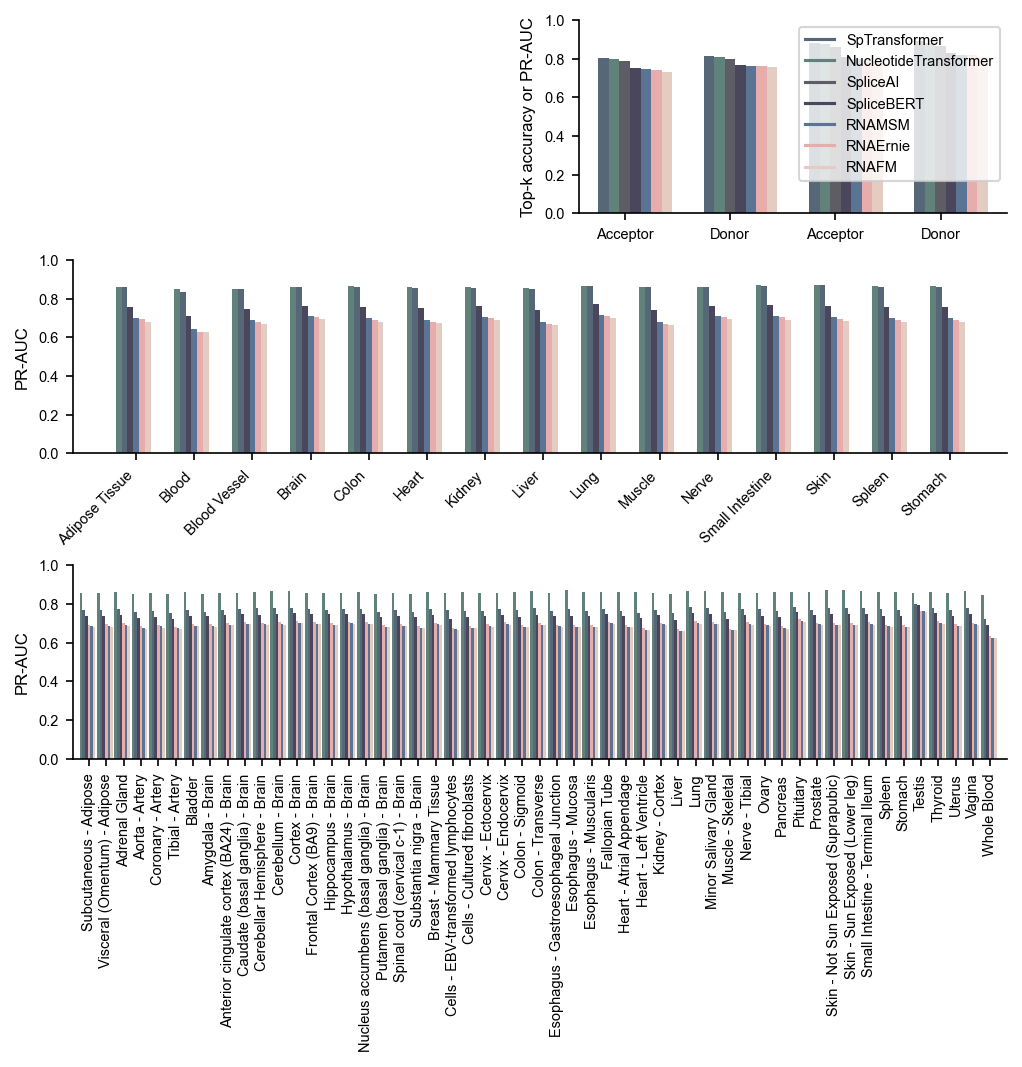

In [102]:
fig = plt.figure(figsize=(6.7, 7), dpi=150, constrained_layout=True)
gs1 = fig.add_gridspec(nrows=3, ncols=2)


# find the best epoch for each method
df_performance = []
methods = data_3['Method'].unique()
for method in methods:
    method_data = data_3[data_3['Method'] == method]
    best_epoch = method_data.loc[(method_data['topk_0_topkl']+method_data['topk_1_topkl']).idxmax()]
    df_performance.append(best_epoch)
df_performance = pd.DataFrame(df_performance)
df_performance = df_performance.sort_values(by='topk_0_topkl', ascending=False)

# plot the performance
ax1 = fig.add_subplot(gs1[0, 1])
# topkl
cnt_methods = df_performance.shape[0]
color_list = [METHOD_COLOR[method] for method in df_performance['Method']]
ax1.bar( 1 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['topk_0_topkl'], 
        width=0.1,
        color=color_list)
ax1.bar( 2 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['topk_1_topkl'], 
        width=0.1,
        color=color_list)
plt.xticks([1,2,3,4], ['Acceptor', 'Donor','Acceptor', 'Donor'], fontsize=X_TICK_SIZE)
plt.yticks(np.arange(0,1.1,0.2), fontsize=X_TICK_SIZE)
plt.ylabel('Top-k accuracy or PR-AUC', fontsize=X_LABEL_SIZE)

columns = [f'topk_{i}_topkl' for i in range(2)]
print(df_performance['Method'],df_performance[columns].mean(axis=1))
columns = [f'pr_auc_{i}' for i in range(2)]
print(df_performance['Method'],df_performance[columns].mean(axis=1))
print('----')

# pr_auc
ax1.bar( 3 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['pr_auc_0'],
        width=0.1,
        color=color_list)
ax1.bar( 4 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['pr_auc_1'],
        width=0.1,
        color=color_list)

for method in df_performance['Method']:
    plt.plot([], label=method, color=METHOD_COLOR[method])
plt.legend(loc='upper right', fontsize=X_TICK_SIZE)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1)
plt.yticks(fontsize=X_TICK_SIZE)

ax2 = fig.add_subplot(gs1[1, :])
# find the best epoch for each method
df_performance = []
methods = data_15['Method'].unique()
for method in methods:
    method_data = data_15[data_15['Method'] == method]
    columns = [f'pr_auc_{i}' for i in range(15)]
    avg_pr_auc = method_data[columns].mean(axis=1)
    best_epoch = method_data.loc[(avg_pr_auc).idxmax()]
    df_performance.append(best_epoch)
df_performance = pd.DataFrame(df_performance)
df_performance.sort_values('pr_auc_0', ascending=False, inplace=True)
methods = df_performance['Method'].unique()

columns = [f'pr_auc_{i}' for i in range(15)]

width = 0.6 / len(methods)
for idx, method in enumerate(methods):
    method_data = df_performance[df_performance['Method'] == method]
    pr_auc = []
    for i in range(15):
        pr_auc.append(method_data[f'pr_auc_{i}'].max())
    plt.bar(np.arange(15)+(idx - len(methods)//2) *
        width, pr_auc, width=width, label=method, color=METHOD_COLOR[method])
    columns = [f'pr_auc_{i}' for i in range(15)]
    print(method,method_data[columns].mean(axis=1).values)
print('---')
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.2), fontsize=X_TICK_SIZE)
plt.ylabel('PR-AUC', fontsize=X_LABEL_SIZE)
tissue_classes = ['Adipose Tissue', 'Blood', 'Blood Vessel', 'Brain', 'Colon', 'Heart', 'Kidney',
                      'Liver', 'Lung', 'Muscle', 'Nerve', 'Small Intestine', 'Skin', 'Spleen', 'Stomach']
plt.xticks(np.arange(15), tissue_classes, fontsize=X_TICK_SIZE, rotation=45, ha='right')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax3 = fig.add_subplot(gs1[2, :])

methods = data_53['Method'].unique()
df_performance = []
for method in methods:
    method_data = data_53[data_53['Method'] == method]
    columns = [f'pr_auc_{i}' for i in range(53)]
    avg_pr_auc = method_data[columns].mean(axis=1)
    best_epoch = method_data.loc[(avg_pr_auc).idxmax()]
    df_performance.append(best_epoch)
df_performance = pd.DataFrame(df_performance)
df_performance.sort_values('pr_auc_0', ascending=False, inplace=True)
methods = df_performance['Method'].unique()

width = 0.9 / len(methods)
for idx, method in enumerate(methods):
    method_data = df_performance[df_performance['Method'] == method]
    pr_auc = []
    for i in range(53):
        pr_auc.append(method_data[f'pr_auc_{i}'].max())
    plt.bar(np.arange(53)+(idx - len(methods)//2) *
        width, pr_auc, width=width, label=method, color=METHOD_COLOR[method])
    columns = [f'pr_auc_{i}' for i in range(53)]
    print(method,method_data[columns].mean(axis=1).values)
plt.yticks(np.arange(0,1.1,0.2), fontsize=X_TICK_SIZE)
plt.ylabel('PR-AUC', fontsize=X_LABEL_SIZE)
plt.xlim(-0.9,53)
plt.xticks(np.arange(53), tissue_names_53, fontsize=X_TICK_SIZE, rotation=90, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.savefig('figures/figure4.pdf')
plt.savefig('figures/figure4.png')

In [76]:
data_15.head()

,Method,Epoch,topk_0_topkl,topk_0_threshold,topk_1_topkl,topk_1_threshold,topk_2_topkl,topk_2_threshold,topk_3_topkl,topk_3_threshold,...,roc_auc_7,roc_auc_8,roc_auc_9,roc_auc_10,roc_auc_11,roc_auc_12,roc_auc_13,roc_auc_14,Time,param
54,SpliceBERT,0,0.689861,0.7354,0.659666,0.6424,0.679975,0.7310,0.699104,0.7302,...,0.999107,0.999069,0.999072,0.999036,0.999089,0.999062,0.999017,0.999136,2607.2100s,1e-5
55,SpliceBERT,1,0.701528,0.6978,0.672233,0.5949,0.691943,0.6843,0.712158,0.6882,...,0.999245,0.999203,0.999206,0.999220,0.999227,0.999197,0.999199,0.999272,1957.7831s,1e-5
56,SpliceBERT,2,0.706296,0.6024,0.671888,0.5177,0.696635,0.5956,0.715560,0.6065,...,0.999284,0.999263,0.999254,0.999271,0.999277,0.999248,0.999255,0.999309,1953.1476s,1e-5
57,SpliceBERT,3,0.708981,0.6301,0.678315,0.5584,0.700177,0.6273,0.719375,0.6274,...,0.999342,0.999295,0.999287,0.999310,0.999316,0.999291,0.999301,0.999348,1957.2483s,1e-5
58,SpliceBERT,4,0.705509,0.6575,0.673610,0.5675,0.697640,0.6521,0.715606,0.6637,...,0.999343,0.999288,0.999289,0.999296,0.999303,0.999270,0.999292,0.999333,1956.9035s,1e-5


Supplementary - small training dataset and full test dataset

In [77]:
file_list = ['./tables/sp1_4_3small_collected_data.csv',
             './tables/sp1_5_3small_collected_data.csv']
param_list = ['1e-4','1e-5']
data_splice, param_dict =load_nRC_data(file_list,param_list,column=['pr_auc_0','pr_auc_1'])
data_splice.head()

,Method,Epoch,topk_0_topkl,topk_0_threshold,topk_1_topkl,topk_1_threshold,pr_auc_0,pr_auc_1,roc_auc_0,roc_auc_1,Time,param
70,SpliceBERT,0,0.732265,0.6826,0.743126,0.7663,0.773778,0.791083,0.997995,0.997778,1058.5769s,1e-5
71,SpliceBERT,1,0.748448,0.7973,0.754543,0.7055,0.803542,0.812714,0.998397,0.998453,704.7594s,1e-5
72,SpliceBERT,2,0.751260,0.6842,0.761980,0.6720,0.812298,0.825070,0.998618,0.998661,704.7947s,1e-5
73,SpliceBERT,3,0.748660,0.6634,0.763865,0.6806,0.809321,0.824738,0.998717,0.998579,706.4876s,1e-5
74,SpliceBERT,4,0.755505,0.6898,0.763917,0.6472,0.818329,0.828848,0.998813,0.998821,705.5898s,1e-5


66     NucleotideTransformer
54                  SpliceAI
74                SpliceBERT
104                 RNAErnie
29                    RNAMSM
49             SpTransformer
13                     RNAFM
Name: Method, dtype: object 66     0.797106
54     0.774655
74     0.759711
104    0.733205
29     0.731989
49     0.724879
13     0.717379
dtype: float64
66     NucleotideTransformer
54                  SpliceAI
74                SpliceBERT
104                 RNAErnie
29                    RNAMSM
49             SpTransformer
13                     RNAFM
Name: Method, dtype: object 66     0.868889
54     0.837025
74     0.823589
104    0.777820
29     0.778094
49     0.770798
13     0.757616
dtype: float64


meta NOT subset; don't know how to subset; dropped


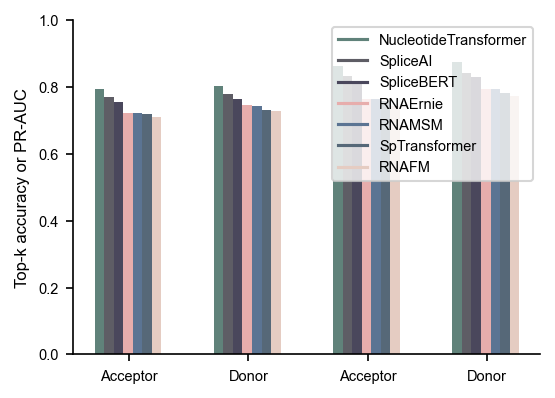

In [108]:
def draw_performance_3class(data:pd.DataFrame):
    data = data.copy(deep=True)
    df_performance = []
    methods = data['Method'].unique()
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[(method_data['pr_auc_0']+method_data['pr_auc_1']).idxmax()]
        df_performance.append(best_epoch)
    df_performance = pd.DataFrame(df_performance)
    df_performance = df_performance.sort_values(by='topk_0_topkl', ascending=False)
    cnt_methods = df_performance.shape[0]
    color_list = [METHOD_COLOR[method] for method in df_performance['Method']]
    _width = 0.08
    plt.bar( 1 - 0.25 + np.arange(cnt_methods)*_width, df_performance['topk_0_topkl'], 
            width=_width,
            color=color_list)
    plt.bar( 2 - 0.25 + np.arange(cnt_methods)*_width, df_performance['topk_1_topkl'], 
            width=_width,
            color=color_list)
    plt.bar( 3 - 0.25 + np.arange(cnt_methods)*_width, df_performance['pr_auc_0'],
            width=_width,
            color=color_list)
    plt.bar( 4 - 0.25 + np.arange(cnt_methods)*_width, df_performance['pr_auc_1'],
            width=_width,
            color=color_list)
    for method in df_performance['Method']:
        plt.plot([], label=method, color=METHOD_COLOR[method])
        plt.legend(loc='upper right', fontsize=X_TICK_SIZE)

    print(df_performance['Method'],df_performance[['topk_0_topkl','topk_1_topkl']].mean(axis=1))
    print(df_performance['Method'],df_performance[['pr_auc_0','pr_auc_1']].mean(axis=1))
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylim(0,1)
    plt.yticks(fontsize=X_TICK_SIZE)


fig = plt.figure(figsize=(6.7, 7), dpi=150, constrained_layout=True)
plt.subplot(3,2,2)

draw_performance_3class(data_splice)

plt.xticks([1,2,3,4], ['Acceptor', 'Donor','Acceptor', 'Donor'], fontsize=X_TICK_SIZE)
plt.ylabel('Top-k accuracy or PR-AUC', fontsize=X_LABEL_SIZE)

plt.savefig('figures/splice_small.pdf')
plt.savefig('figures/splice_small.png')

Supplementary - comparing long and short input sequence

{'SpliceAI_short': '1e-4', 'SpTransformer_short': '1e-4', 'NucleotideTransformer_short': '1e-4', 'SpliceBERT': '1e-5', 'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'SpTransformer': '1e-4', 'SpliceAI': '1e-4', 'NucleotideTransformer': '1e-4'}
77                   SpTransformer
91           NucleotideTransformer
83                        SpliceAI
9                   SpliceAI_short
17             SpTransformer_short
101                     SpliceBERT
29     NucleotideTransformer_short
59                          RNAMSM
125                       RNAErnie
44                           RNAFM
Name: Method, dtype: object 77     0.809075
91     0.803490
83     0.792997
9      0.778093
17     0.768900
101    0.760950
29     0.761630
59     0.756710
125    0.751926
44     0.742043
dtype: float64
77                   SpTransformer
91           NucleotideTransformer
83                        SpliceAI
9                   SpliceAI_short
17             SpTransformer_short
101                 

meta NOT subset; don't know how to subset; dropped


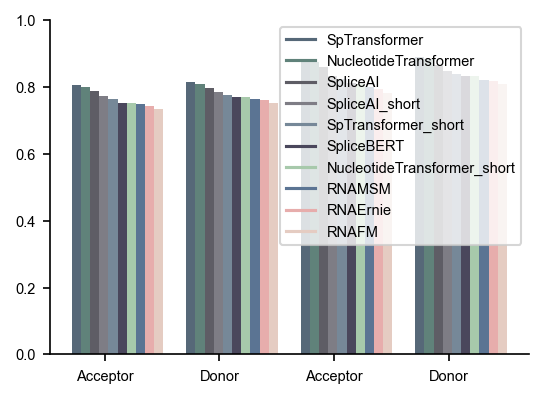

In [109]:
# data 3cls
file_list = ['./tables/sp3_1_4_ablation_collected_data.csv',
             './tables/sp3_1_5_ablation_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(2)]
data_3_short,param_dict =load_nRC_data(file_list,param_list,column=columns)
print(param_dict)


finput_3 = 'tables/splice3cls_supp_collected_data.csv'

data_3_short['Time'] = data_3_short['Time'].apply(lambda x: float(str(x).split('s')[0]))
data_3_short['Epoch'] = data_3_short['Epoch'].astype(int)
data_3_short.head()

fig = plt.figure(figsize=(6.7, 7), dpi=150, constrained_layout=True)
plt.subplot(3,2,2)

draw_performance_3class(data_3_short)

plt.xticks([1,2,3,4], ['Acceptor', 'Donor','Acceptor', 'Donor'], fontsize=X_TICK_SIZE)
plt.savefig('figures/figs4_ablation.pdf')
plt.savefig('figures/figs4_ablation.png')

meta NOT subset; don't know how to subset; dropped


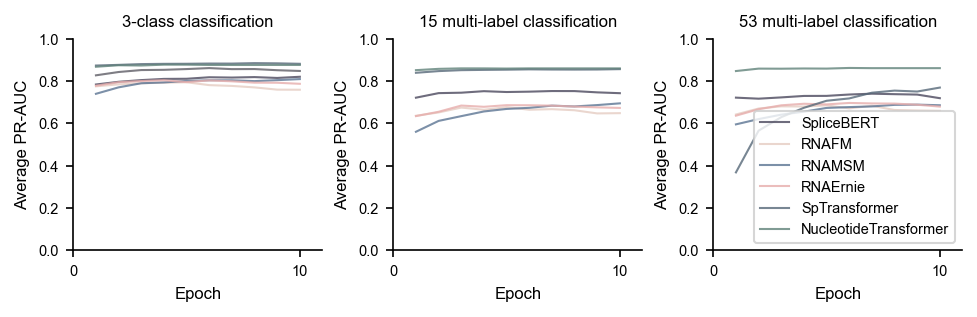

In [14]:
def draw_splice_supp(data_3,data_15,data_53):

    def draw_panel(data,column,ylabel='Ave'):
        draw_epoch_performance(data, column=column)
        plt.xlabel('Epoch', size=X_LABEL_SIZE)
        plt.ylabel(ylabel, size=X_LABEL_SIZE)
        plt.xlim(-1,10)
        # index starts from 0, figure starts from 1
        plt.xticks(np.arange(0,11,10)-1,np.arange(0,11,10),fontsize=X_TICK_SIZE)
        plt.yticks(fontsize=X_TICK_SIZE)


    fig = plt.figure(figsize=(6.4, 2), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=1, ncols=3)
    #
    ax1 = fig.add_subplot(gs1[0, 0])
    data = data_3.copy()
    columns = [f'pr_auc_{x}' for x in range(2)]
    data['Avg'] = data[columns].mean(axis=1)
    draw_panel(data,'Avg',ylabel='Average PR-AUC')
    plt.title('3-class classification',size=X_LABEL_SIZE)

    #
    if data_15 is not None:
        ax2 = fig.add_subplot(gs1[0, 1])
        data = data_15.copy()
        columns = [f'pr_auc_{x}' for x in range(15)]
        data['Avg'] = data[columns].mean(axis=1)
        draw_panel(data,'Avg',ylabel='Average PR-AUC')
        plt.title('15 multi-label classification',size=X_LABEL_SIZE)

    #
    ax3 = fig.add_subplot(gs1[0, 2])
    data = data_53.copy()
    columns = [f'pr_auc_{x}' for x in range(53)]
    data['Avg'] = data[columns].mean(axis=1)
    draw_panel(data,'Avg',ylabel='Average PR-AUC')
    plt.title('53 multi-label classification',size=X_LABEL_SIZE)

    plt.legend(prop={'size': X_TICK_SIZE},
               loc='lower right')

draw_splice_supp(data_3,data_15,data_53)
plt.savefig('figures/splice_performance_sup.png', dpi=300)
plt.savefig('figures/splice_performance_sup.pdf', dpi=300)

## Mean ribosome loading

meta NOT subset; don't know how to subset; dropped


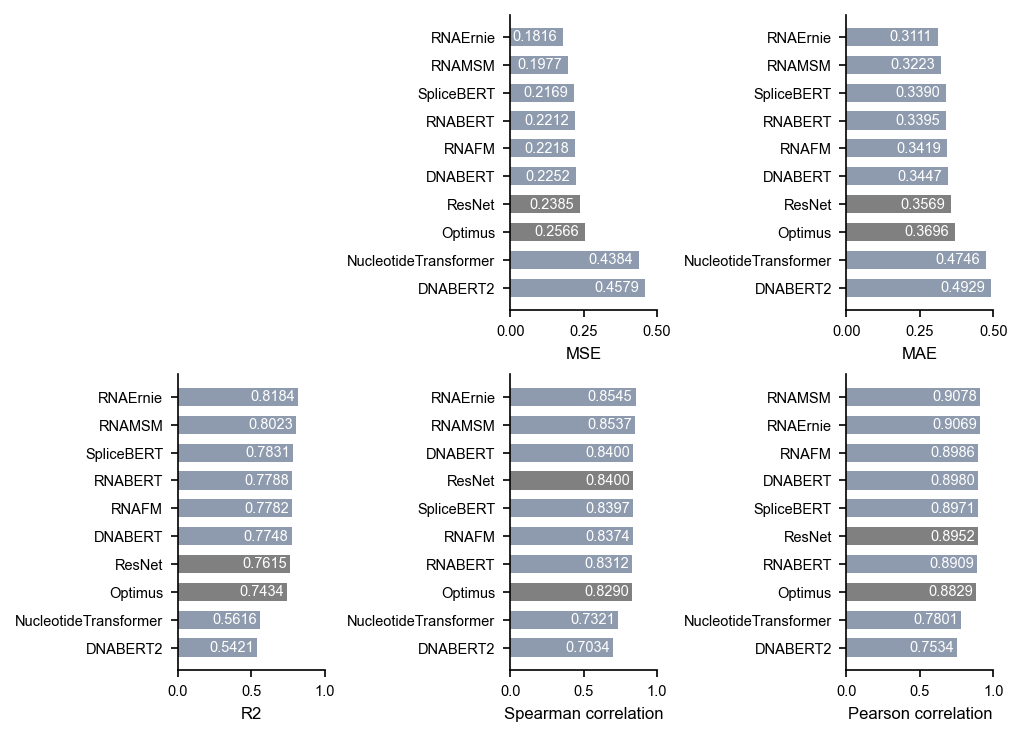

In [100]:
def solve(data_mrl):
    data = data_mrl.copy()
    data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))

    fig = plt.figure(figsize=(6.7, 4.8), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=2, ncols=6)

    # performance
    ax1 = fig.add_subplot(gs1[0, 2:4])

    methods = data['Method'].unique()
    performance = []
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['mse'].idxmin()]
        performance.append(best_epoch)
    performance = pd.DataFrame(performance)
    performance.set_index('Method', inplace=True)

    performance.sort_values('mse', ascending=True, inplace=True)
    draw_performance_bar(performance, column='mse')
    plt.xlabel('MSE', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)
    plt.xlim(0,0.5)
    plt.gca().invert_yaxis()

    ax2 = fig.add_subplot(gs1[0, 4:6])
    performance.sort_values('mae', ascending=True, inplace=True)
    draw_performance_bar(performance, column='mae')
    plt.xlabel('MAE', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)
    plt.xlim(0,0.5)
    plt.gca().invert_yaxis()

    # display the value on the bar
    ax3 = fig.add_subplot(gs1[1, 0:2])
    performance.sort_values('r2', ascending=True, inplace=True)

    draw_performance_bar(performance, column='r2')
    plt.xlim(0,1)
    plt.xlabel('R2', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    # display the value on the bar
    ax4 = fig.add_subplot(gs1[1, 2:4])
    performance.sort_values('spearman', ascending=True, inplace=True)
    draw_performance_bar(performance, column='spearman')
    plt.xlabel('Spearman correlation', size=X_LABEL_SIZE)
    plt.xlim(0,1)
    plt.ylabel(None, size=X_LABEL_SIZE)

    # display the value on the bar
    ax4 = fig.add_subplot(gs1[1, 4:6])
    performance.sort_values('pearson', ascending=True, inplace=True)

    draw_performance_bar(performance, column='pearson')
    plt.xlabel('Pearson correlation', size=X_LABEL_SIZE)
    plt.xlim(0,1)
    plt.ylabel(None, size=X_LABEL_SIZE)

    return
    

file_list = ['./tables/mrl_1_3_collected_data.csv',
             './tables/mrl_1_4_collected_data.csv']
param_list = ['1e-3','1e-4']
data_mrl,param_dict = load_nRC_data(file_list,param_list,column='spearman')

solve(data_mrl)

plt.savefig('figures/mrl.png')
plt.savefig('figures/mrl.pdf')

meta NOT subset; don't know how to subset; dropped


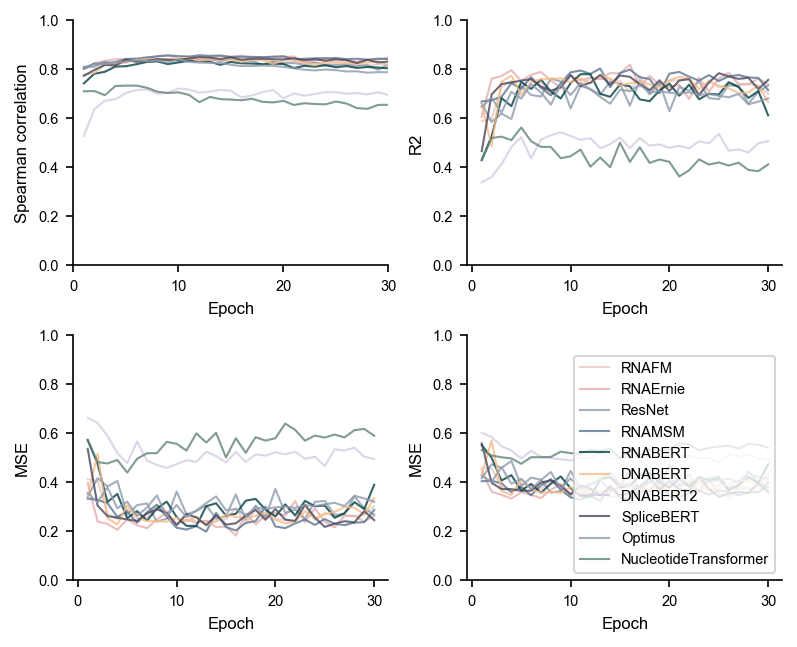

In [113]:
def draw_mrl_supp(mrl_data):

    mrl_data = mrl_data.copy()
    fig = plt.figure(figsize=(5.2, 4.2), dpi=150, constrained_layout=True)
    #
    plt.subplot(2,2,1)
    draw_epoch_performance(mrl_data, column='spearman')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('Spearman correlation', size=X_LABEL_SIZE)
    plt.xlim(-1,29)
    # index starts from 0, figure starts from 1
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)


    plt.subplot(2,2,2)
    draw_epoch_performance(mrl_data, column='r2')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('R2', size=X_LABEL_SIZE)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)


    plt.subplot(2,2,3)
    draw_epoch_performance(mrl_data, column='mse')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('MSE', size=X_LABEL_SIZE)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)

    
    plt.subplot(2,2,4)
    draw_epoch_performance(mrl_data, column='mae')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('MSE', size=X_LABEL_SIZE)
    plt.xticks(np.arange(0,31,10)-1,np.arange(0,31,10),fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)

    plt.legend(prop={'size': X_TICK_SIZE},
               loc='lower right')

draw_mrl_supp(data_mrl)

plt.savefig('figures/mrl_curve.png')
plt.savefig('figures/mrl_curve.pdf',dpi=300)

## Collect time cost

{'SpliceBERT': '1e-5', 'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'SpTransformer': '1e-4', 'SpliceAI': '1e-4', 'NucleotideTransformer': '1e-4'}
{'SpliceBERT': '1e-5', 'RNAFM': '1e-4', 'RNAMSM': '1e-4', 'RNAErnie': '1e-5', 'SpTransformer': '1e-4', 'NucleotideTransformer': '1e-4'}


meta NOT subset; don't know how to subset; dropped


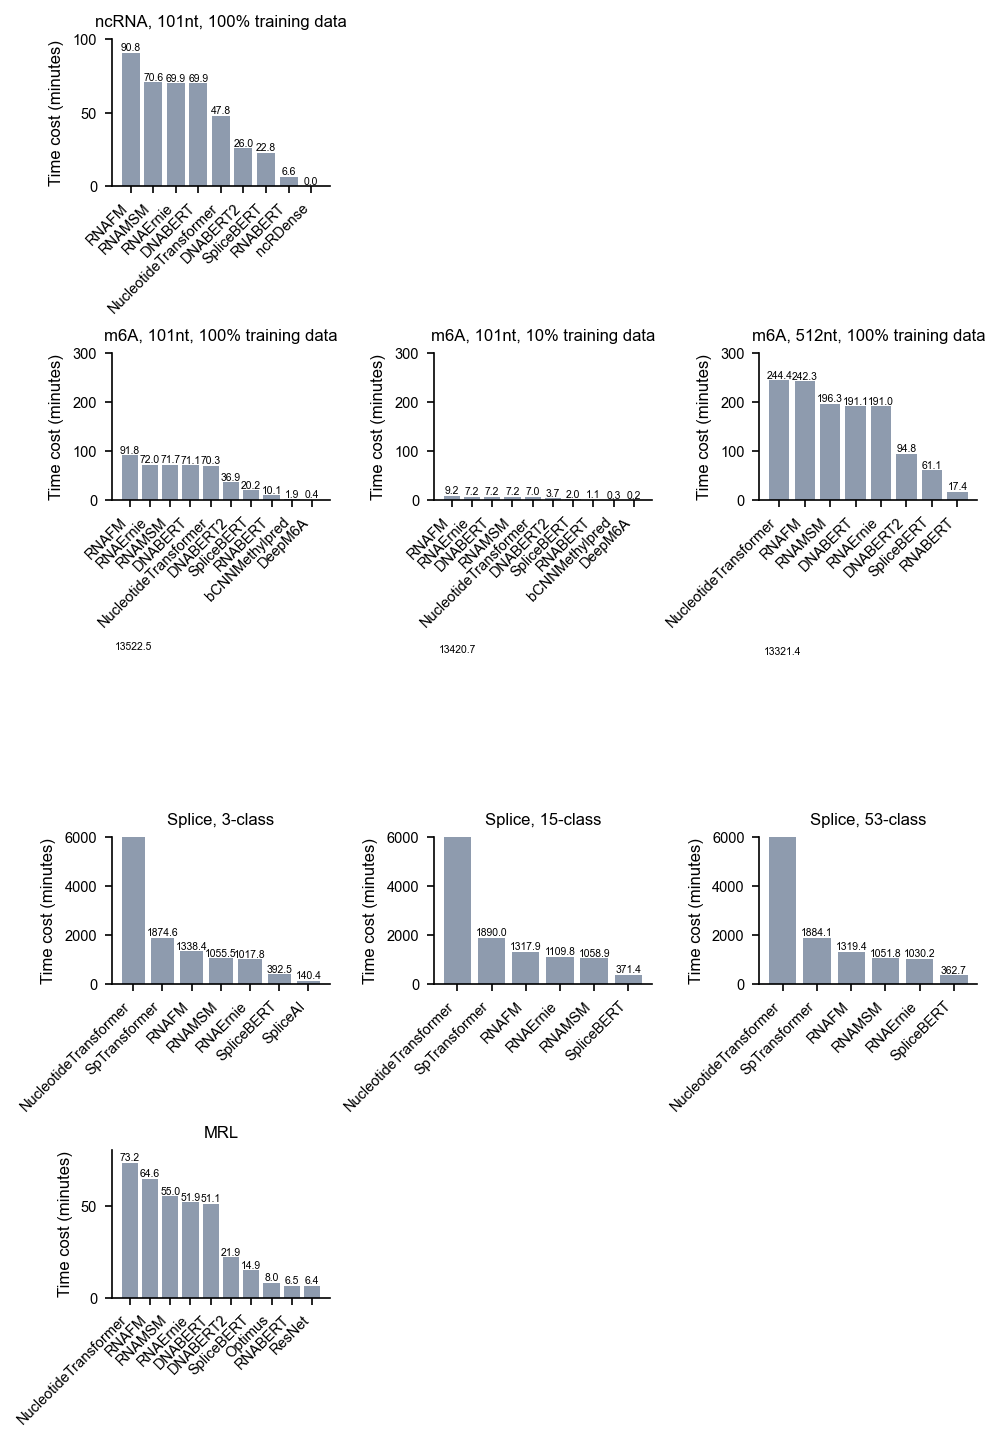

In [17]:
def convert_time(data):
    # the time values were formatted as 'xxx s', we need to convert them to float
    data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))
    # then, convert the time values to minutes
    data['Time'] = data['Time'] / 60
    return data

def draw_time_barplot(data):
    data = data[~data['Method'].isin(['nRC', 'RNACon'])]
    time_cost = data.groupby('Method')['Time'].sum()
    time_cost.sort_values(ascending=False, inplace=True)

    plt.ylabel('Time cost (minutes)', size=X_LABEL_SIZE)
    plt.bar(time_cost.index, time_cost.values, color=COLOR['general'])
    # draw text on the bar
    for i, v in enumerate(time_cost.values):
        plt.text(i, v, '{:.1f}'.format(v), color='black',
                 va='bottom', ha='center', fontsize=global_xtick_size['xsmall'])
    plt.xticks(fontsize=X_TICK_SIZE, rotation=45, ha='right')
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

file_list = ['tables/nRC_1_4_collected_data.csv','tables/nRC_1_5_collected_data.csv']
lr_list = ['nRC_1_4','nRC_1_5']
nrc_data,param_dict = load_nRC_data(file_list,lr_list)
nrc_data = convert_time(nrc_data)

# print(nrc_data.groupby('Method')['Time'].sum())

plt.figure(figsize=(6.5, 9.5), dpi=150, constrained_layout=True)
plt.subplot(4,3,1)
draw_time_barplot(nrc_data)
plt.title('ncRNA, 101nt, 100% training data',size=X_LABEL_SIZE)
plt.ylim(0,100)

file_list = ['./tables/m6a101_4_collected_data.csv',
             './tables/m6a101_5_collected_data.csv']
param_list = ['1e-4','1e-5']
m6a_data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
m6a_data = convert_time(m6a_data)

# print(m6a_data.groupby('Method')['Time'].sum())
plt.subplot(4,3,4)
plt.title('m6A, 101nt, 100% training data',size=X_LABEL_SIZE)
draw_time_barplot(m6a_data)
plt.ylim(0,300)

### 0.1 training data
file_list = ['./tables/m6a101_4_0.1_collected_data.csv',
             './tables/m6a101_5_0.1_collected_data.csv']
param_list = ['1e-4','1e-5']
data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
plt.subplot(4,3,5)
plt.title('m6A, 101nt, 10% training data',size=X_LABEL_SIZE)
data = convert_time(data)
draw_time_barplot(data)
plt.ylim(0,300)

### 1.0 training data 512 length
file_list = ['./tables/m6a509_4_collected_data.csv',
             './tables/m6a509_5_collected_data.csv']
param_list = ['1e-4','1e-5']
data,param_dict =load_nRC_data(file_list,param_list,column='pr_auc')
plt.subplot(4,3,6)
plt.title('m6A, 512nt, 100% training data',size=X_LABEL_SIZE)
data = convert_time(data)
draw_time_barplot(data)
plt.ylim(0,300)


### splice data
# data 3cls
file_list = ['./tables/sp3_1_4_collected_data.csv',
             './tables/sp3_1_5_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(2)]
data_3,param_dict =load_nRC_data(file_list,param_list,column=columns)
print(param_dict)

# data 15cls
file_list = ['./tables/sp15_1_4_collected_data.csv',
             './tables/sp15_1_5_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(15)]
data_15,param_dict =load_nRC_data(file_list,param_list,column=columns)
print(param_dict)

# data 53cls
file_list = ['./tables/sp53_1_4_collected_data.csv',
             './tables/sp53_1_5_collected_data.csv']
param_list = ['1e-4','1e-5']
columns = [f'pr_auc_{x}' for x in range(53)]
data_53,param_dict =load_nRC_data(file_list,param_list,column=columns)

plt.subplot(4,3,7)
data_3 = convert_time(data_3)
draw_time_barplot(data_3)
plt.title('Splice, 3-class',size=X_LABEL_SIZE)
plt.ylim(0,6000)

plt.subplot(4,3,8)
data_15 = convert_time(data_15)
draw_time_barplot(data_15)
plt.title('Splice, 15-class',size=X_LABEL_SIZE)
plt.ylim(0,6000)

data_53 = convert_time(data_53)
plt.subplot(4,3,9)
draw_time_barplot(data_53)
plt.title('Splice, 53-class',size=X_LABEL_SIZE)
plt.ylim(0,6000)

## MRL

file_list = ['./tables/mrl_1_3_collected_data.csv',
             './tables/mrl_1_4_collected_data.csv']
param_list = ['1e-3','1e-4']
data_mrl,param_dict = load_nRC_data(file_list,param_list,column='spearman')
plt.subplot(4,3,10)
data_mrl = convert_time(data_mrl)
draw_time_barplot(data_mrl)
plt.title('MRL',size=X_LABEL_SIZE)
plt.ylim(0,80)


plt.savefig('figures/time_cost.png')
plt.savefig('figures/time_cost.pdf',dpi=300)
